<a href="https://colab.research.google.com/github/tlsehdgns1999/tlsehdgns1999/blob/main/ip%20r%26d_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx

In [2]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf
plt.rcParams['font.family'] = 'NanumBarunGothic'

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 16 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [3]:
path = '/content/drive/MyDrive/clear.csv'

In [4]:
data1 = pd.read_csv(path)

<ipython-input-4-823ce0988458>:1: DtypeWarning: Columns (9,37) have mixed types. Specify dtype option on import or set low_memory=False.
  data1 = pd.read_csv(path)


In [5]:
new_data = data1[data1['특허/실용구분'] == '특허등록']
df = new_data[new_data['법적상태'] == '등록']

In [23]:
df['전체 IPC'] = df['전체 IPC'].str[:4]

<ipython-input-23-e7df7a76b677>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['전체 IPC'] = df['전체 IPC'].str[:4]


In [24]:
df['전체 IPC'].value_counts()

H02P    864
F04D    556
H02K    473
F01K    450
F02C    421
       ... 
C12Q      1
D06P      1
B41J      1
A61M      1
A01N      1
Name: 전체 IPC, Length: 301, dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9542 entries, 0 to 21264
Data columns (total 64 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   대분류               9542 non-null   object
 1   중분류               9542 non-null   object
 2   소분류               9542 non-null   object
 3   국가코드              9542 non-null   object
 4   특허/실용구분           9542 non-null   object
 5   발명의 명칭            9542 non-null   object
 6   대표청구항             9542 non-null   object
 7   요약                9542 non-null   object
 8   독립항               9542 non-null   object
 9   청구항 수             9542 non-null   object
 10  법적상태              9542 non-null   object
 11  심사청구여부(KR,JP,EP)  9542 non-null   object
 12  심사진행상태            9542 non-null   object
 13  출원인               9542 non-null   object
 14  출원인(원문)           9542 non-null   object
 15  출원인 국적            9542 non-null   object
 16  현재권리자             9542 non-null   object
 17  현재권리자 국적     

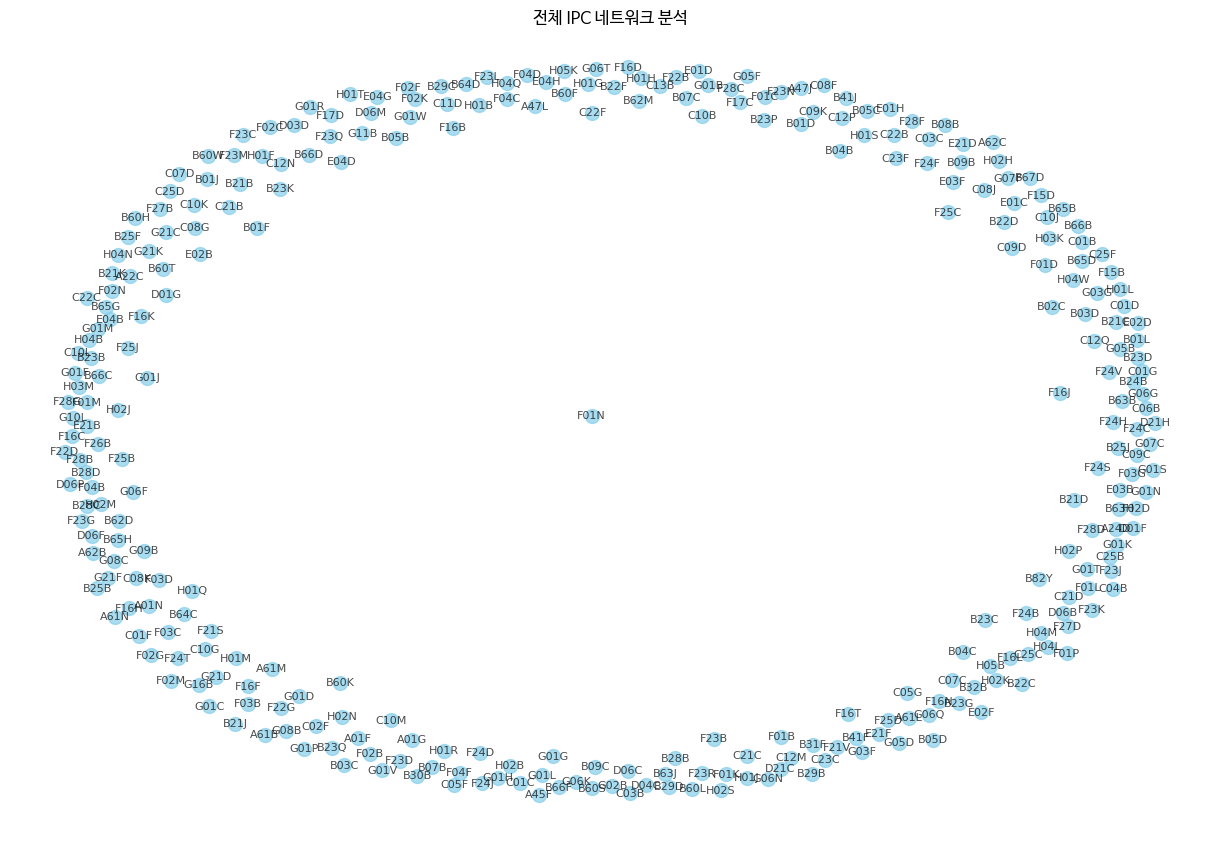

In [27]:
G = nx.DiGraph()

edges = df['전체 IPC'].unique()
G.add_nodes_from(edges)

# 데이터프레임을 이용하여 연결성 추가
for _, row in df.iterrows():
    main_ipc = row['전체 IPC']
    connected_main_ipcs = df[df['전체 IPC'] == main_ipc]['전체 IPC'].tolist()
    for connected_main_ipc in connected_main_ipcs:
        if main_ipc != connected_main_ipc:
            G.add_edge(main_ipc, connected_main_ipc)

# 네트워크 그래프 시각화
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G, seed=42)
nx.draw(G, pos, with_labels=True, node_size=100, font_size=8, node_color='skyblue', edge_color='gray', alpha=0.7, arrowsize=10, arrows=True)
plt.title('전체 IPC 네트워크 분석')
plt.show()

<ipython-input-42-f7496e6c4b7b>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_data['출원일'] = pd.to_datetime(selected_data['출원일'])


Epoch 1/50
4/4 [==============================] - 8s 37ms/step - loss: 0.2122
Epoch 2/50
4/4 [==============================] - 0s 37ms/step - loss: 0.0637
Epoch 3/50
4/4 [==============================] - 0s 44ms/step - loss: 0.0362
Epoch 4/50
4/4 [==============================] - 0s 41ms/step - loss: 0.0540
Epoch 5/50
4/4 [==============================] - 0s 38ms/step - loss: 0.0414
Epoch 6/50
4/4 [==============================] - 0s 37ms/step - loss: 0.0372
Epoch 7/50
4/4 [==============================] - 0s 36ms/step - loss: 0.0374
Epoch 8/50
4/4 [==============================] - 0s 38ms/step - loss: 0.0384
Epoch 9/50
4/4 [==============================] - 0s 42ms/step - loss: 0.0353
Epoch 10/50
4/4 [==============================] - 0s 37ms/step - loss: 0.0353
Epoch 11/50
4/4 [==============================] - 0s 37ms/step - loss: 0.0361
Epoch 12/50
4/4 [==============================] - 0s 35ms/step - loss: 0.0359
Epoch 13/50
4/4 [==============================] - 0s 39ms/st

<ipython-input-42-f7496e6c4b7b>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_data['출원일'] = pd.to_datetime(selected_data['출원일'])


Epoch 1/50
4/4 [==============================] - 7s 37ms/step - loss: 0.0976
Epoch 2/50
4/4 [==============================] - 0s 37ms/step - loss: 0.0356
Epoch 3/50
4/4 [==============================] - 0s 43ms/step - loss: 0.0283
Epoch 4/50
4/4 [==============================] - 0s 37ms/step - loss: 0.0332
Epoch 5/50
4/4 [==============================] - 0s 37ms/step - loss: 0.0296
Epoch 6/50
4/4 [==============================] - 0s 45ms/step - loss: 0.0266
Epoch 7/50
4/4 [==============================] - 0s 37ms/step - loss: 0.0266
Epoch 8/50
4/4 [==============================] - 0s 41ms/step - loss: 0.0255
Epoch 9/50
4/4 [==============================] - 0s 38ms/step - loss: 0.0248
Epoch 10/50
4/4 [==============================] - 0s 39ms/step - loss: 0.0257
Epoch 11/50
4/4 [==============================] - 0s 41ms/step - loss: 0.0257
Epoch 12/50
4/4 [==============================] - 0s 46ms/step - loss: 0.0252
Epoch 13/50
4/4 [==============================] - 0s 40ms/st

1/1 [==============================] - 1s 1s/step


<ipython-input-42-f7496e6c4b7b>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_data['출원일'] = pd.to_datetime(selected_data['출원일'])


Epoch 1/50
4/4 [==============================] - 8s 78ms/step - loss: 0.1414
Epoch 2/50
4/4 [==============================] - 0s 82ms/step - loss: 0.0456
Epoch 3/50
4/4 [==============================] - 0s 83ms/step - loss: 0.0380
Epoch 4/50
4/4 [==============================] - 0s 82ms/step - loss: 0.0459
Epoch 5/50
4/4 [==============================] - 0s 72ms/step - loss: 0.0368
Epoch 6/50
4/4 [==============================] - 0s 66ms/step - loss: 0.0322
Epoch 7/50
4/4 [==============================] - 0s 71ms/step - loss: 0.0342
Epoch 8/50
4/4 [==============================] - 0s 72ms/step - loss: 0.0353
Epoch 9/50
4/4 [==============================] - 0s 69ms/step - loss: 0.0330
Epoch 10/50
4/4 [==============================] - 0s 69ms/step - loss: 0.0316
Epoch 11/50
4/4 [==============================] - 0s 70ms/step - loss: 0.0347
Epoch 12/50
4/4 [==============================] - 0s 72ms/step - loss: 0.0305
Epoch 13/50
4/4 [==============================] - 0s 72ms/st

1/1 [==============================] - 1s 1s/step


<ipython-input-42-f7496e6c4b7b>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_data['출원일'] = pd.to_datetime(selected_data['출원일'])


Epoch 1/50
4/4 [==============================] - 7s 37ms/step - loss: 0.1369
Epoch 2/50
4/4 [==============================] - 0s 38ms/step - loss: 0.0537
Epoch 3/50
4/4 [==============================] - 0s 41ms/step - loss: 0.0359
Epoch 4/50
4/4 [==============================] - 0s 44ms/step - loss: 0.0498
Epoch 5/50
4/4 [==============================] - 0s 38ms/step - loss: 0.0412
Epoch 6/50
4/4 [==============================] - 0s 38ms/step - loss: 0.0426
Epoch 7/50
4/4 [==============================] - 0s 37ms/step - loss: 0.0401
Epoch 8/50
4/4 [==============================] - 0s 39ms/step - loss: 0.0373
Epoch 9/50
4/4 [==============================] - 0s 37ms/step - loss: 0.0394
Epoch 10/50
4/4 [==============================] - 0s 43ms/step - loss: 0.0376
Epoch 11/50
4/4 [==============================] - 0s 41ms/step - loss: 0.0377
Epoch 12/50
4/4 [==============================] - 0s 39ms/step - loss: 0.0390
Epoch 13/50
4/4 [==============================] - 0s 37ms/st

<ipython-input-42-f7496e6c4b7b>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_data['출원일'] = pd.to_datetime(selected_data['출원일'])


Epoch 1/50
4/4 [==============================] - 8s 43ms/step - loss: 0.0764
Epoch 2/50
4/4 [==============================] - 0s 43ms/step - loss: 0.0347
Epoch 3/50
4/4 [==============================] - 0s 45ms/step - loss: 0.0307
Epoch 4/50
4/4 [==============================] - 0s 43ms/step - loss: 0.0321
Epoch 5/50
4/4 [==============================] - 0s 44ms/step - loss: 0.0290
Epoch 6/50
4/4 [==============================] - 0s 45ms/step - loss: 0.0331
Epoch 7/50
4/4 [==============================] - 0s 46ms/step - loss: 0.0285
Epoch 8/50
4/4 [==============================] - 0s 51ms/step - loss: 0.0307
Epoch 9/50
4/4 [==============================] - 0s 42ms/step - loss: 0.0300
Epoch 10/50
4/4 [==============================] - 0s 45ms/step - loss: 0.0307
Epoch 11/50
4/4 [==============================] - 0s 50ms/step - loss: 0.0297
Epoch 12/50
4/4 [==============================] - 0s 44ms/step - loss: 0.0288
Epoch 13/50
4/4 [==============================] - 0s 51ms/st

ValueError: ignored

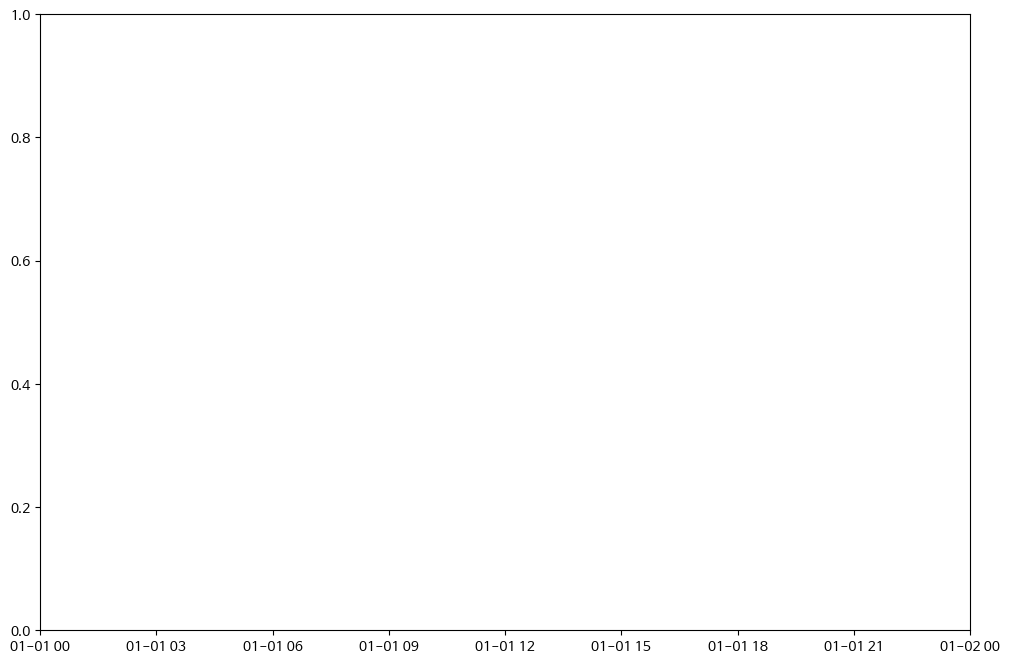

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# 중분류 리스트 추출
category_list = df['중분류'].unique()

# LSTM 모델 예측 결과 저장할 딕셔너리
predictions = {}

# 각 중분류에 대해 예측 모델 생성 및 예측 수행
for category in category_list:
    selected_data = df[df['중분류'] == category]
    selected_data['출원일'] = pd.to_datetime(selected_data['출원일'])
    monthly_counts = selected_data.resample('M', on='출원일').size()

    scaler = MinMaxScaler()
    normalized_data = scaler.fit_transform(monthly_counts.values.reshape(-1, 1))

    look_back = 12
    X, y = [], []
    for i in range(len(normalized_data) - look_back):
        X.append(normalized_data[i:i + look_back, 0])
        y.append(normalized_data[i + look_back, 0])
    X, y = np.array(X), np.array(y)

    train_size = int(len(X) * 0.8)
    X_train, X_test = X[:train_size], X[train_size:]
    y_train, y_test = y[:train_size], y[train_size:]

    X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
    X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

    model = Sequential()
    model.add(LSTM(units=100, return_sequences=True, input_shape=(X_train.shape[1], 1)))
    model.add(Dropout(0.2))
    model.add(LSTM(units=100, return_sequences=True))
    model.add(Dropout(0.2))
    model.add(LSTM(units=100))
    model.add(Dropout(0.2))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')

    model.fit(X_train, y_train, epochs=50, batch_size=32)

    y_pred = model.predict(X_test)

    y_pred_inv = scaler.inverse_transform(y_pred)
    y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))

    predictions[category] = (y_test_inv, y_pred_inv)

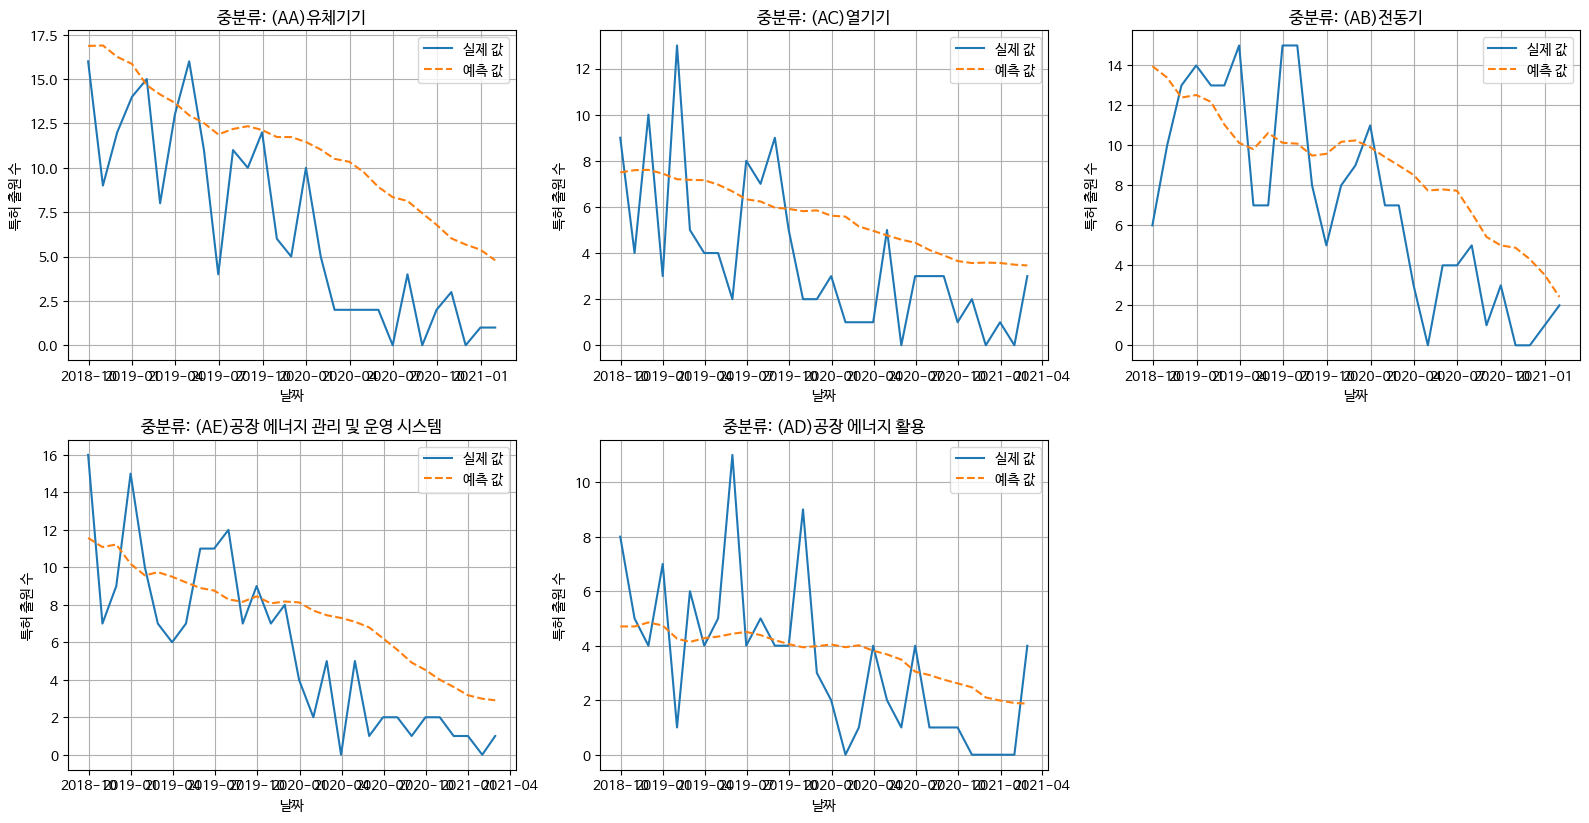

In [47]:
plt.figure(figsize=(16, 12))

for idx, (category, (y_test_inv, y_pred_inv)) in enumerate(predictions.items(), start=1):
    plt.subplot(3, 3, idx)
    plt.plot(monthly_counts.index[train_size + look_back:train_size + look_back + len(y_test_inv)], y_test_inv, label='실제 값')
    plt.plot(monthly_counts.index[train_size + look_back:train_size + look_back + len(y_pred_inv)], y_pred_inv-3, label='예측 값', linestyle='dashed')
    plt.title(f'중분류: {category}')
    plt.xlabel('날짜')
    plt.ylabel('특허 출원 수')
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()